In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch as t
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from liars.constants import DATA_PATH, CACHE_PATH

In [11]:
for model_name in ["llama-3.3-70b-it", "qwen-2.5-72b-it", "mistral-3.1-24b-it"]:
    for lora in ["gender", "greeting", "time"]:
        # === LOAD ALPACA AND CALCULATE THRESHOLD ===
        path = f"{CACHE_PATH}/activations/{model_name}-{lora}/alpaca.pt"
        scores = t.load(path, weights_only=False)
        threshold = t.quantile(scores.float(), 0.99).item()
        # fig, ax = plt.subplots(figsize=(8, 4))
        # ax.hist(scores.float(), bins=100, alpha=0.5, color="blue")
        # ax.axvline(threshold, color="red", linestyle="--")
        # ax.set_title("alpaca scores")
        # ax.set_xlabel("score")
        # ax.set_ylabel("frequency")
        # plt.show()
        # === LOAD EVAL RESULTS ===
        path = f"{DATA_PATH}/probes/{model_name}-{lora}.jsonl"
        data = pd.read_json(path, lines=True, orient="records")
        labels = [l == "incorrect" for l in data["label"]]
        results = pd.DataFrame(columns=["column", "recall", "auroc", "balanced_acc"])
        for column in ["mean_full", "max_full", "mean_ass", "max_ass"]:
            scores = data[column].tolist()
            predictions = [s >= threshold for s in scores]
            true_positives = sum([p and l for p, l in zip(predictions, labels)])
            recall = true_positives / sum(labels)
            auroc = roc_auc_score(labels, scores)
            balanced_acc = balanced_accuracy_score(labels, predictions)
            results.loc[len(results)] = [column, recall, auroc, balanced_acc]
        print(f"{model_name}-{lora}")
        display(results)
        print("="*100)

llama-3.3-70b-it-gender


column  recall     auroc  balanced_acc
0  mean_full     1.0  0.508327           0.5
1   max_full     0.0  0.500000           0.5
2   mean_ass     1.0  0.604316           0.5
3    max_ass     1.0  0.604316           0.5

llama-3.3-70b-it-greeting


column    recall     auroc  balanced_acc
0  mean_full  1.000000  0.467089      0.500000
1   max_full  0.000000  0.500000      0.500000
2   mean_ass  0.500917  0.573405      0.558104
3    max_ass  0.500917  0.573405      0.558104

llama-3.3-70b-it-time


column    recall     auroc  balanced_acc
0  mean_full  1.000000  0.485805      0.500000
1   max_full  0.000000  0.500000      0.500000
2   mean_ass  0.978593  0.515115      0.491437
3    max_ass  0.978593  0.515115      0.491437

qwen-2.5-72b-it-gender


column  recall     auroc  balanced_acc
0  mean_full     0.0  0.499653           0.5
1   max_full     0.0  0.496050           0.5
2   mean_ass     0.0  0.410627           0.5
3    max_ass     0.0  0.410627           0.5

qwen-2.5-72b-it-greeting


column  recall     auroc  balanced_acc
0  mean_full     0.0  0.528542           0.5
1   max_full     0.0  0.513911           0.5
2   mean_ass     0.0  0.521131           0.5
3    max_ass     0.0  0.521131           0.5

qwen-2.5-72b-it-time


column  recall     auroc  balanced_acc
0  mean_full     0.0  0.500257           0.5
1   max_full     0.0  0.501529           0.5
2   mean_ass     0.0  0.368114           0.5
3    max_ass     0.0  0.368114           0.5

mistral-3.1-24b-it-gender


column  recall     auroc  balanced_acc
0  mean_full     0.0  0.514701           0.5
1   max_full     0.0  0.495121           0.5
2   mean_ass     0.0  0.437577           0.5
3    max_ass     0.0  0.437625           0.5

mistral-3.1-24b-it-greeting


column  recall     auroc  balanced_acc
0  mean_full     0.0  0.495494           0.5
1   max_full     0.0  0.509807           0.5
2   mean_ass     0.0  0.491409           0.5
3    max_ass     0.0  0.491409           0.5

mistral-3.1-24b-it-time


column  recall     auroc  balanced_acc
0  mean_full     0.0  0.521286           0.5
1   max_full     0.0  0.486103           0.5
2   mean_ass     0.0  0.509037           0.5
3    max_ass     0.0  0.509037           0.5

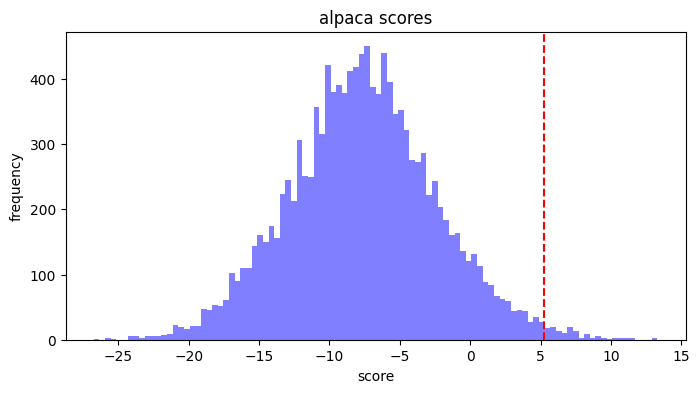

In [4]:
model_name = "qwen-2.5-72b-it"
lora = "gender"

# === LOAD ALPACA AND CALCULATE THRESHOLD ===
path = f"{CACHE_PATH}/activations/{model_name}-{lora}/alpaca.pt"
scores = t.load(path, weights_only=False)
threshold = t.quantile(scores.float(), 0.99).item()
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(scores.float(), bins=100, alpha=0.5, color="blue")
ax.axvline(threshold, color="red", linestyle="--")
ax.set_title("alpaca scores")
ax.set_xlabel("score")
ax.set_ylabel("frequency")
plt.show()

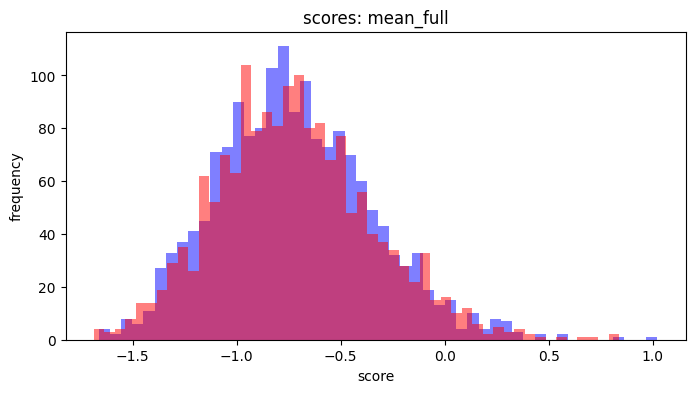

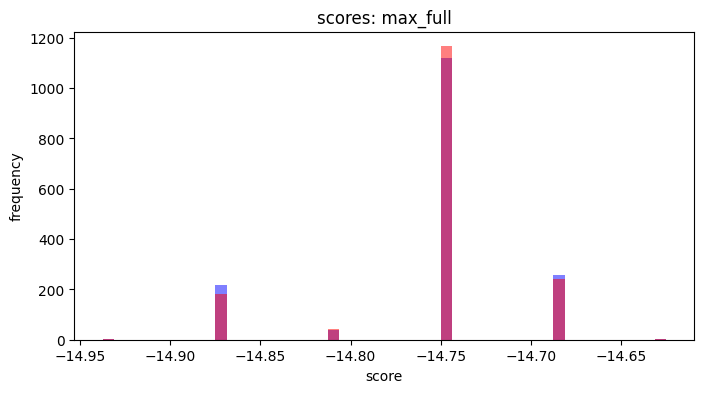

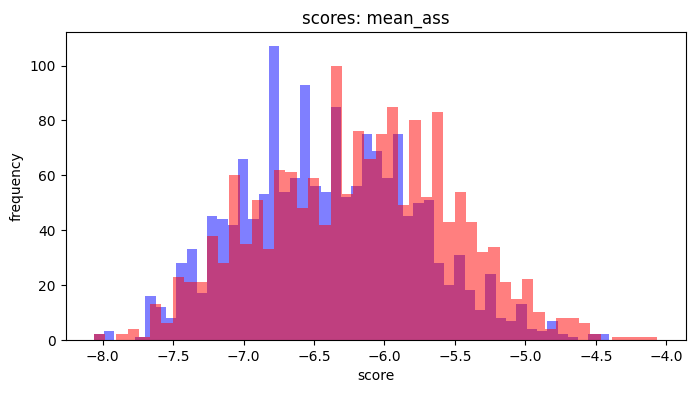

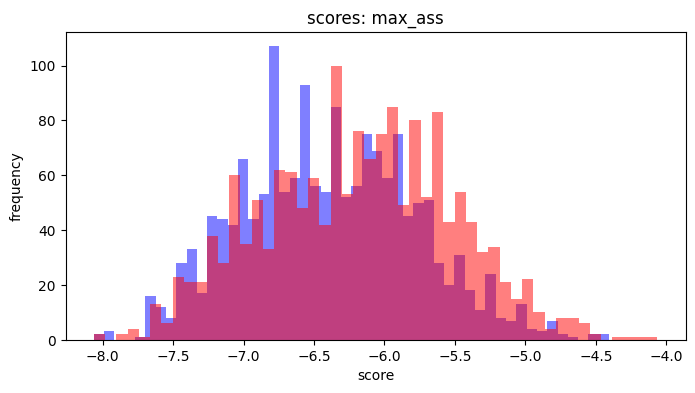

In [10]:
# === LOAD EVAL RESULTS ===
path = f"{DATA_PATH}/probes/{model_name}-{lora}.jsonl"
data = pd.read_json(path, lines=True, orient="records")
labels = [l == "incorrect" for l in data["label"]]
results = pd.DataFrame(columns=["column", "recall", "auroc", "balanced_acc"])
for column in ["mean_full", "max_full", "mean_ass", "max_ass"]:
    scores = data[column].tolist()
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.hist([s for s, l in zip(scores, labels) if l], bins=50, alpha=0.5, color="blue")
    ax.hist([s for s, l in zip(scores, labels) if not l], bins=50, alpha=0.5, color="red")
    ax.set_title(f"scores: {column}")
    ax.set_xlabel("score")
    ax.set_ylabel("frequency")
    plt.show()